In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt

In [2]:

transform = transforms.ToTensor()

In [3]:
train_dataset = torchvision.datasets.MNIST(root = "./data" , train = True , download = True ,  transform = transform)
valid_dataset = torchvision.datasets.MNIST(root = "./data" , train = False , download = True ,  transform = transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 137449000.91it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42444181.44it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 112212671.93it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20244982.75it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
train_dl = torch.utils.data.DataLoader(train_dataset , batch_size = 100)

In [5]:
class Encoder(nn.Module):
  def __init__(self , input_size = 28*28 , hidden_size1 = 128 , hidden_size2 = 16 , z_dim = 2):
    super().__init__()
    self.fc1 = nn.Linear(input_size , hidden_size1)
    self.fc2 = nn.Linear(hidden_size1 , hidden_size2)
    self.fc3 = nn.Linear(hidden_size2 , z_dim)
    self.relu = nn.ReLU()
  def forward(self , x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [6]:
class Decoder(nn.Module):
  def __init__(self , output_size = 28*28 , hidden_size1 = 128 , hidden_size2 = 16 , z_dim = 2):
    super().__init__()
    self.fc1 = nn.Linear(z_dim , hidden_size2)
    self.fc2 = nn.Linear(hidden_size2 , hidden_size1)
    self.fc3 = nn.Linear(hidden_size1 , output_size)
    self.relu = nn.ReLU()
  def forward(self , x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [8]:
enc = Encoder().to(device)
dec = Decoder().to(device)

In [9]:
loss_fn = nn.MSELoss()
optimizer_enc = torch.optim.Adam(enc.parameters())
optimizer_dec = torch.optim.Adam(dec.parameters())

In [10]:
train_loss = []

In [11]:
num_epochs = 200

In [12]:
for epoch in range(num_epochs):
  train_epoch_loss = 0
  for (imgs , _) in train_dl:
    imgs = imgs.to(device)
    #100 , 1 , 28 , 28 ---> (100 , 28*28)
    imgs = imgs.flatten(1)
    latents = enc(imgs)
    output = dec(latents)
    loss = loss_fn(output , imgs)
    train_epoch_loss += loss.cpu().detach().numpy()
    optimizer_enc.zero_grad()
    optimizer_dec.zero_grad()
    loss.backward()
    optimizer_enc.step()
    optimizer_dec.step()
  train_loss.append(train_epoch_loss)

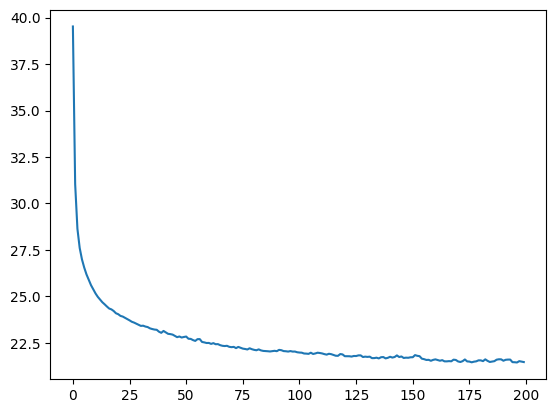

In [13]:
plt.plot(train_loss)

In [14]:
values = None
all_labels = []

with torch.no_grad():
  for (imgs , labels) in train_dl:
    imgs = imgs.to(device)
    imgs = imgs.flatten(1)
    all_labels.extend(list(labels.numpy()))
    latents = enc(imgs)
    if values is None:
      values = latents.cpu()
    else:
      values = torch.vstack([values , latents.cpu()])

In [15]:
values.shape

torch.Size([60000, 2])

In [16]:
all_labels

[5,
 0,
 4,
 1,
 9,
 2,
 1,
 3,
 1,
 4,
 3,
 5,
 3,
 6,
 1,
 7,
 2,
 8,
 6,
 9,
 4,
 0,
 9,
 1,
 1,
 2,
 4,
 3,
 2,
 7,
 3,
 8,
 6,
 9,
 0,
 5,
 6,
 0,
 7,
 6,
 1,
 8,
 7,
 9,
 3,
 9,
 8,
 5,
 9,
 3,
 3,
 0,
 7,
 4,
 9,
 8,
 0,
 9,
 4,
 1,
 4,
 4,
 6,
 0,
 4,
 5,
 6,
 1,
 0,
 0,
 1,
 7,
 1,
 6,
 3,
 0,
 2,
 1,
 1,
 7,
 9,
 0,
 2,
 6,
 7,
 8,
 3,
 9,
 0,
 4,
 6,
 7,
 4,
 6,
 8,
 0,
 7,
 8,
 3,
 1,
 5,
 7,
 1,
 7,
 1,
 1,
 6,
 3,
 0,
 2,
 9,
 3,
 1,
 1,
 0,
 4,
 9,
 2,
 0,
 0,
 2,
 0,
 2,
 7,
 1,
 8,
 6,
 4,
 1,
 6,
 3,
 4,
 5,
 9,
 1,
 3,
 3,
 8,
 5,
 4,
 7,
 7,
 4,
 2,
 8,
 5,
 8,
 6,
 7,
 3,
 4,
 6,
 1,
 9,
 9,
 6,
 0,
 3,
 7,
 2,
 8,
 2,
 9,
 4,
 4,
 6,
 4,
 9,
 7,
 0,
 9,
 2,
 9,
 5,
 1,
 5,
 9,
 1,
 2,
 3,
 2,
 3,
 5,
 9,
 1,
 7,
 6,
 2,
 8,
 2,
 2,
 5,
 0,
 7,
 4,
 9,
 7,
 8,
 3,
 2,
 1,
 1,
 8,
 3,
 6,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 7,
 2,
 7,
 3,
 0,
 4,
 6,
 5,
 2,
 6,
 4,
 7,
 1,
 8,
 9,
 9,
 3,
 0,
 7,
 1,
 0,
 2,
 0,
 3,
 5,
 4,
 6,
 5,
 8,
 6,
 3,
 7,
 5,
 8,
 0,
 9,
 1,
 0,


In [17]:
cmap = plt.get_cmap('viridis', 10)

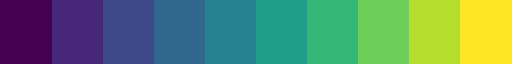

In [18]:
cmap

In [19]:
all_labels = np.array(all_labels)
values = values.numpy()

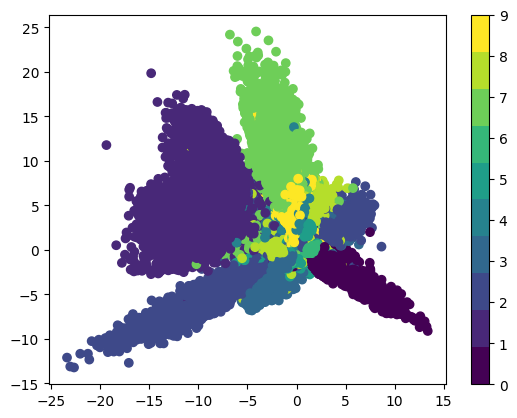

In [20]:
pc = plt.scatter(values[: , 0] , values[: , 1] , c = all_labels , cmap = cmap)
plt.colorbar(pc)

In [21]:
all_means = {}
for i in range(10):
  inds = np.argwhere(all_labels == i)
  num_latents = values[inds].squeeze()
  mean = num_latents.mean(axis = 0)
  all_means[i] = (mean[0] , mean[1])


In [22]:
all_means

{0: (2.78328, -1.5566118),
 1: (-7.9995255, 5.919867),
 2: (-1.1419631, -0.56801605),
 3: (-1.0619609, -1.4082464),
 4: (-0.09680835, 1.9171867),
 5: (0.11640083, 0.33867145),
 6: (1.0811208, 0.052421227),
 7: (-1.6715149, 7.8945613),
 8: (-0.5550833, 0.7707097),
 9: (-0.4217048, 2.456047)}

In [23]:
torch.Tensor(all_means[0])[None , ...].shape

torch.Size([1, 2])

In [1]:
with torch.no_grad():
  pred = dec(torch.Tensor(all_means[5])[None , ...].to(device)).cpu()
transforms.ToPILImage()(pred.reshape(1 , 28 , 28))

NameError: ignored